
# 互评作业1 数据探索性分析与数据预处理
数据集为Oakland Crime Statistics 2011 to 2016，包含6个csv文件，在2012和2014年的csv文件中，比其他文件多出名为‘zipcode'的无用属性，将其剔除。需要统计的属性如下：
- Agency ： 机构
- Create Time ：立案时间
- Location ： 案件位置
- Area Id ： 区域ID
- Beat ： 巡逻区域
- Priority ： 案件等级
- Incident Type Id ： 事件类型Id
- Incident Type Description ： 事件类型描述
- Event Number ： 事件编号
- Closed Time ： 结案时间

In [1]:
import pandas as pd
import numpy as np
import re

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


## 1. 提取及整理数据

In [2]:
data1 = pd.read_csv('Oakland\\records-for-2011.csv')
data2 = pd.read_csv('Oakland\\records-for-2012.csv')
data3 = pd.read_csv('Oakland\\records-for-2013.csv')
data4 = pd.read_csv('Oakland\\records-for-2014.csv')
data5 = pd.read_csv('Oakland\\records-for-2015.csv')
data6 = pd.read_csv('Oakland\\records-for-2016.csv')
data1.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


In [3]:
data1.shape,data2.shape,data3.shape,data4.shape,data5.shape,data6.shape

((180016, 10),
 (187431, 11),
 (188052, 10),
 (187480, 11),
 (192581, 10),
 (110828, 10))

### 1.1 清洗数据

删除ZipCodes列，调整data2和data4的列位置

In [4]:
data2 = data2[['Agency', 'Create Time', 'Location 1', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number','Closed Time']]
data4 = data4[['Agency', 'Create Time', 'Location 1', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number','Closed Time']]

In [5]:
data2

,Agency,Create Time,Location 1,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2012-01-01T00:00:25.000,"{'human_address': '{""address"": ""OLIVE ST"", ""ci...",2.0,32Y,2.0,415GS,415 GUNSHOTS,LOP120101000004,2012-01-01T00:40:27.000
1,OP,2012-01-01T00:00:27.000,"{'human_address': '{""address"": ""AV&MACARTHUR B...",2.0,30Y,2.0,415GS,415 GUNSHOTS,LOP120101000003,2012-01-01T01:34:31.000
2,OP,2012-01-01T00:00:48.000,"{'human_address': '{""address"": ""SYCAMORE ST"", ...",1.0,06X,2.0,949,SUSPICIOUS VEHICLE,LOP120101000005,2012-01-01T01:18:38.000
3,OP,2012-01-01T00:00:58.000,"{'human_address': '{""address"": ""AV&MACARTHUR B...",2.0,35X,2.0,415GS,415 GUNSHOTS,LOP120101000008,2012-01-01T02:37:00.000
4,OP,2012-01-01T00:01:14.000,"{'human_address': '{""address"": ""ST&WOOD ST"", ""...",1.0,02Y,2.0,415GS,415 GUNSHOTS,LOP120101000007,2012-01-01T02:12:39.000
...,...,...,...,...,...,...,...,...,...,...
187426,OP,2012-11-26T22:54:15.000,"{'latitude': '37.82844', 'longitude': '-122.27...",1.0,25X,1.0,211,ROBBERY,LOP121126001022,2012-11-26T23:26:17.000
187427,OP,2012-11-29T04:04:54.000,"{'latitude': '39.442458', 'longitude': '-74.50...",1.0,08X,2.0,SECCK,SECURITY CHECK,LOP121129000093,2012-11-29T04:44:04.000
187428,OP,2012-11-28T10:12:13.000,"{'latitude': '33.50162', 'longitude': '-101.84...",2.0,NaN,2.0,273_5,INFLICT INJURY ON SP,LOP121128000342,2012-11-28T10:22:21.000
187429,OP,2012-11-29T04:41:24.000,"{'latitude': '26.945458', 'longitude': '-82.35...",2.0,31X,2.0,SECCK,SECURITY CHECK,LOP121129000099,2012-11-29T05:39:57.000


**观察发现data2和data4的数据中location属性的数据格式为dict类型，从中提取出address值填充Location**

In [6]:
def fillLocation (x) :
    x = str(x)
    resGroup = re.search(r'address": "(.*?)"',x)
    if resGroup !=None:
        x = resGroup.group().replace('"',"").replace("address: ","")
    else:
        x = None
    return(x)
# 提取address信息并替换 Location 1 属性的值
data2['Location 1'] = data2['Location 1'].apply(fillLocation)
data4['Location 1'] = data4['Location 1'].apply(fillLocation)

In [7]:
data2

,Agency,Create Time,Location 1,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2012-01-01T00:00:25.000,OLIVE ST,2.0,32Y,2.0,415GS,415 GUNSHOTS,LOP120101000004,2012-01-01T00:40:27.000
1,OP,2012-01-01T00:00:27.000,AV&MACARTHUR BLVD,2.0,30Y,2.0,415GS,415 GUNSHOTS,LOP120101000003,2012-01-01T01:34:31.000
2,OP,2012-01-01T00:00:48.000,SYCAMORE ST,1.0,06X,2.0,949,SUSPICIOUS VEHICLE,LOP120101000005,2012-01-01T01:18:38.000
3,OP,2012-01-01T00:00:58.000,AV&MACARTHUR BLVD,2.0,35X,2.0,415GS,415 GUNSHOTS,LOP120101000008,2012-01-01T02:37:00.000
4,OP,2012-01-01T00:01:14.000,ST&WOOD ST,1.0,02Y,2.0,415GS,415 GUNSHOTS,LOP120101000007,2012-01-01T02:12:39.000
...,...,...,...,...,...,...,...,...,...,...
187426,OP,2012-11-26T22:54:15.000,980&WB AV&MACARTHUR BLVD,1.0,25X,1.0,211,ROBBERY,LOP121126001022,2012-11-26T23:26:17.000
187427,OP,2012-11-29T04:04:54.000,98TH/D ST&TELEGRAPH AV,1.0,08X,2.0,SECCK,SECURITY CHECK,LOP121129000093,2012-11-29T04:44:04.000
187428,OP,2012-11-28T10:12:13.000,98TH,2.0,NaN,2.0,273_5,INFLICT INJURY ON SP,LOP121128000342,2012-11-28T10:22:21.000
187429,OP,2012-11-29T04:41:24.000,996A EDGEWATER DR,2.0,31X,2.0,SECCK,SECURITY CHECK,LOP121129000099,2012-11-29T05:39:57.000


### 1.2 整合数据

In [8]:
# location列重命名
data2.rename(columns={'Location 1':'Location'},inplace=True)
data3.rename(columns={'Location ':'Location'},inplace=True)
data4.rename(columns={'Location 1':'Location'},inplace=True)

data_all=[data1,data2,data3,data4,data5,data6]
cols1 = list(data1)
cols2 = list(data2)
cols3 = list(data3)
cols4 = list(data4)
cols5 = list(data5)
cols6 = list(data6)
cols_all = [cols1,cols2,cols3,cols4,cols5,cols6]

In [9]:
cols_all

[['Agency',
  'Create Time',
  'Location',
  'Area Id',
  'Beat',
  'Priority',
  'Incident Type Id',
  'Incident Type Description',
  'Event Number',
  'Closed Time'],
 ['Agency',
  'Create Time',
  'Location',
  'Area Id',
  'Beat',
  'Priority',
  'Incident Type Id',
  'Incident Type Description',
  'Event Number',
  'Closed Time'],
 ['Agency',
  'Create Time',
  'Location',
  'Area Id',
  'Beat',
  'Priority',
  'Incident Type Id',
  'Incident Type Description',
  'Event Number',
  'Closed Time'],
 ['Agency',
  'Create Time',
  'Location',
  'Area Id',
  'Beat',
  'Priority',
  'Incident Type Id',
  'Incident Type Description',
  'Event Number',
  'Closed Time'],
 ['Agency',
  'Create Time',
  'Location',
  'Area Id',
  'Beat',
  'Priority',
  'Incident Type Id',
  'Incident Type Description',
  'Event Number',
  'Closed Time'],
 ['Agency',
  'Create Time',
  'Location',
  'Area Id',
  'Beat',
  'Priority',
  'Incident Type Id',
  'Incident Type Description',
  'Event Number',
  'C

## 2. 数据摘要
### 2.1 计算标称数据频数
由表可知标称属性包括：
- Location
- Area Id
- Beat
- Incident Type Id
- Incident Type Description

In [10]:
# 输出每个表的每个标称属性的数据频数
for data,cols in zip(data_all,cols_all):
    for col in cols: 
        print(data[col].value_counts())
        print('-' * 60)
    print("=" * 60)
    

OP    180015
Name: Agency, dtype: int64
------------------------------------------------------------
2011-06-02T00:00:00.000    4
2011-09-21T14:05:59.000    3
2011-03-27T00:22:41.000    3
2011-08-02T13:57:31.000    2
2011-03-22T22:40:56.000    2
                          ..
2011-08-09T08:29:41.000    1
2011-02-16T20:40:41.000    1
2011-12-07T06:39:55.000    1
2011-11-14T14:24:39.000    1
2011-10-31T17:19:10.000    1
Name: Create Time, Length: 179451, dtype: int64
------------------------------------------------------------
 INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
                           ... 
45TH HARRINGTON AV            1
ENOS COLBY ST                 1
E AV&WOOLSEY ST               1
E MORGAN AV                   1
102ND 47TH AV                 1
Name: Location, Length: 32505, dtype: int64
------------------------------------------------------------
1.0    79152
2

LOP131022000343    1
LOP130215000726    1
LOP130226001035    1
LOP131227000460    1
LOP131101001054    1
                  ..
LOP130428000687    1
LOP130531000138    1
LOP130829000664    1
LOP130408000859    1
LOP130313000908    1
Name: Event Number, Length: 188051, dtype: int64
------------------------------------------------------------
2013-09-01T17:23:50.000    4
2013-02-12T22:52:01.000    4
2013-04-26T21:30:39.000    3
2013-12-23T18:18:23.000    3
2013-09-23T21:02:34.000    2
                          ..
2013-10-14T05:32:17.000    1
2013-09-20T19:55:30.000    1
2013-12-18T23:51:06.000    1
2013-09-29T02:42:52.000    1
2013-10-03T01:44:41.000    1
Name: Closed Time, Length: 187487, dtype: int64
------------------------------------------------------------
OP    187480
Name: Agency, dtype: int64
------------------------------------------------------------
2014-10-14T02:45:12.000    14
2014-10-14T02:46:45.000    11
2014-09-20T00:00:00.000     4
2014-01-01T00:00:00.000     4
2014-11-04

2016-05-29T00:43:38.000    3
2016-03-04T22:44:50.000    2
2016-04-26T19:00:21.000    2
2016-05-25T16:59:37.000    2
2016-02-12T19:58:03.000    2
                          ..
2016-07-04T23:12:59.000    1
2016-03-28T14:18:03.000    1
2016-04-15T02:06:31.000    1
2016-01-21T15:54:29.000    1
2016-02-08T08:45:15.000    1
Name: Closed Time, Length: 110451, dtype: int64
------------------------------------------------------------


### 2.2 对数值数据计算五数概括

In [11]:
data1['Priority'].describe()['mean']

1.7961114351581813

In [12]:
# 各表的Priority五数概括，记录每年的Priority均值
number_data = ['Priority']
mean_all = []
for data in data_all:
    print(data[number_data].describe())
    mean_all.append(data[number_data].describe()['Priority']['mean'])

            Priority
count  180015.000000
mean        1.796111
std         0.402916
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
            Priority
count  187430.000000
mean        1.776311
std         0.416717
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
            Priority
count  188051.000000
mean        1.770206
std         0.420967
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
            Priority
count  187480.000000
mean        1.771853
std         0.419639
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
            Priority
count  192581.000000
mean        1.779729
std         0.414443
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
            Priority
count  110827.000000
mean        1

In [13]:
# 各表中priority的频数分布
number_data = ['Priority']
for data in data_all:
    print(data[number_data].value_counts())

Priority
2.0         143314
1.0          36699
0.0              2
dtype: int64
Priority
2.0         145504
1.0          41926
dtype: int64
Priority
2.0         144859
1.0          43171
0.0             21
dtype: int64
Priority
2           144707
1            42773
dtype: int64
Priority
2           150162
1            42418
0                1
dtype: int64
Priority
2.0         86272
1.0         24555
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


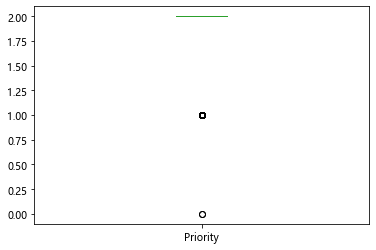

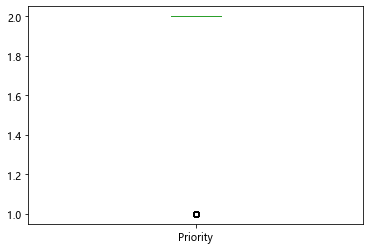

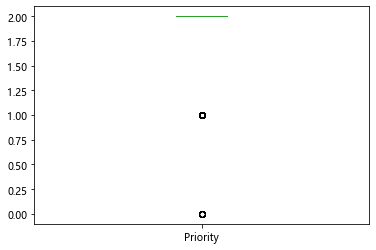

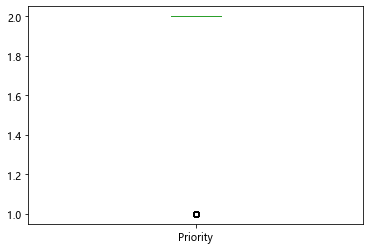

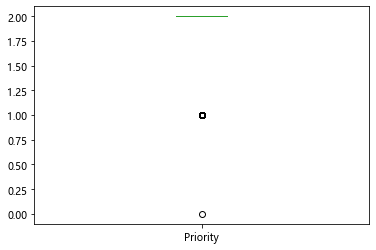

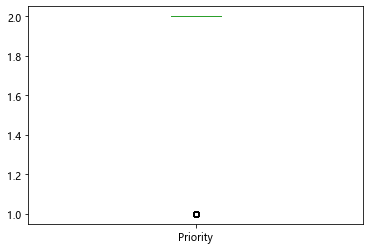

In [14]:
# 各表中priority的盒图
number_data = ['Priority']
for data in data_all:
    print(data[number_data].plot.box())

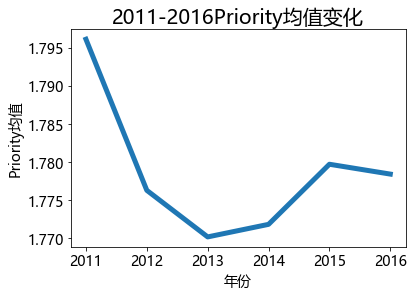

In [15]:
years = [2011,2012,2013,2014,2015,2016]

plt.plot(years,mean_all,linewidth=5)

plt.title("2011-2016Priority均值变化",fontsize=20)
plt.xlabel("年份",fontsize=14)
plt.ylabel("Priority均值",fontsize=14)

plt.tick_params(axis='both',labelsize=14)
 
plt.show()

案件等级最高位2.0，最低为0.0，均值范围是（1.770，1.797)

## 3. 数据可视化
### 3.1 每年每月犯罪数量分析

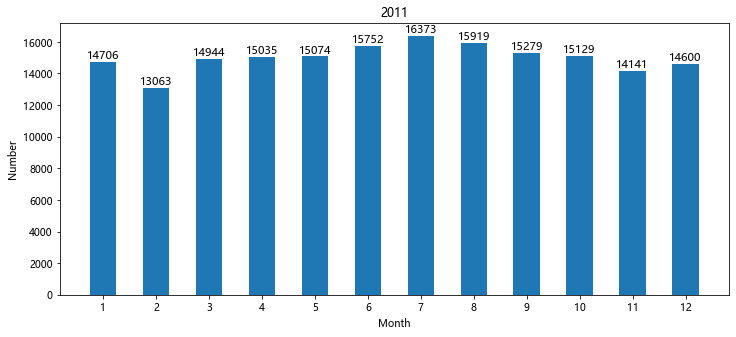

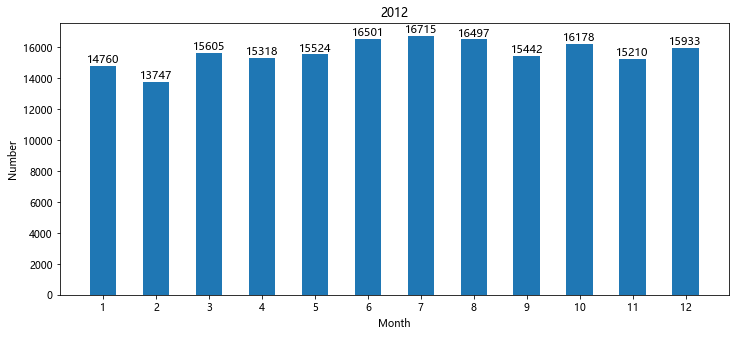

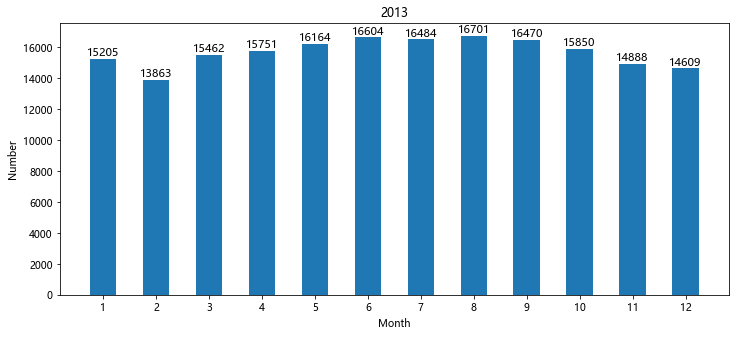

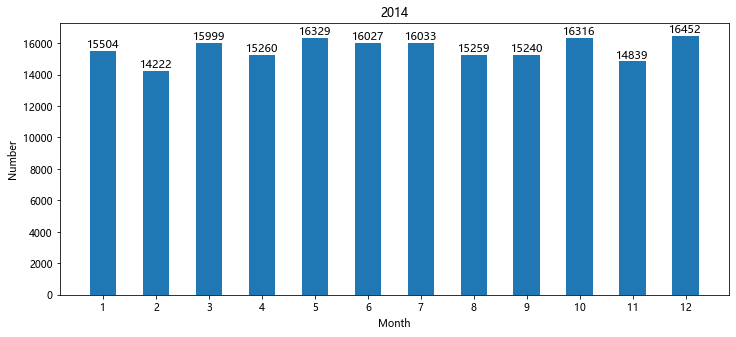

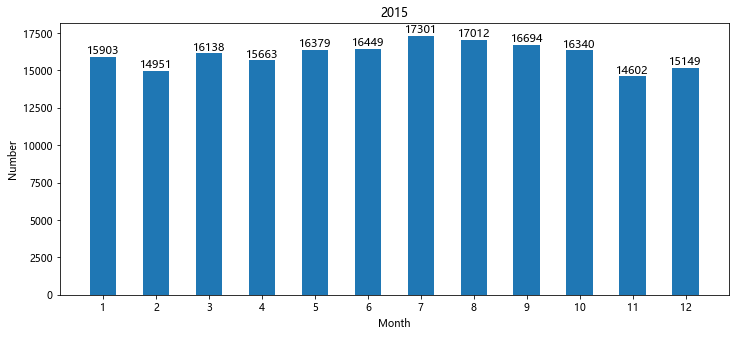

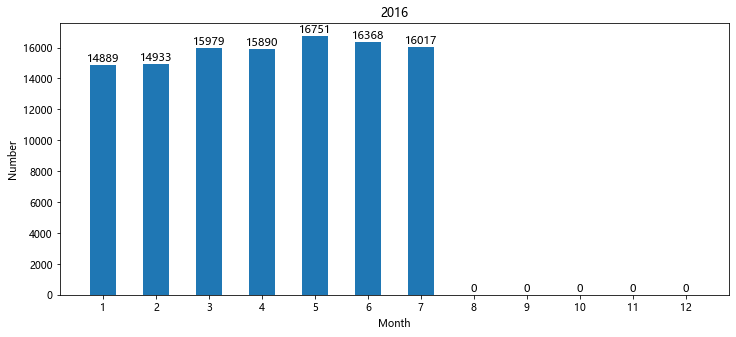

In [16]:
t = 0
mon = 0
index = np.arange(12)
k = 1
year = 2011
for data in data_all:
    lis = data['Create Time']
    lis = lis.dropna()
    lis = lis.values
    mon_count=np.zeros(12)
    for t in lis:
        mon = t[5:7]
        mon_count[int(mon)-1] += 1
    # print(mon_count)
    plt.figure(figsize=(12,5))
    plt.bar(index,mon_count, 0.5, label="mon_count")
    plt.xticks(index,('1','2','3','4','5','6','7','8','9','10','11','12'))
    for a,b in zip(index,mon_count):  
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    plt.xlabel("Month")
    plt.ylabel("Number")  
    plt.title(year)
    year=year+1

由直方图效果可知2016年8月及以后的数据并未统计在内，每年每月立案数量较为平均。

### 3.2 区域每年案件种类分析
**针对区域案件种类，统计前五大犯罪类型933R,SECCK,415,911H,10851及其他类型的案件情况。**

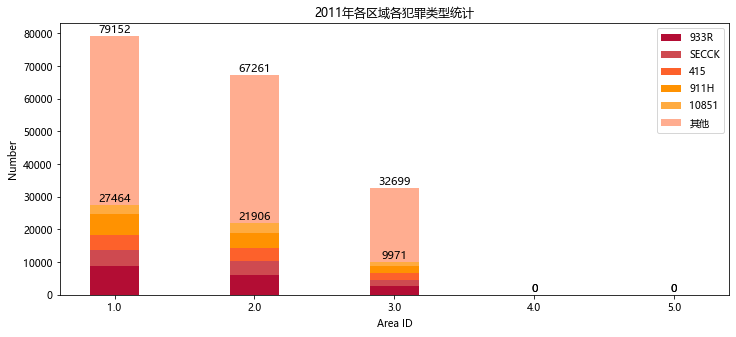

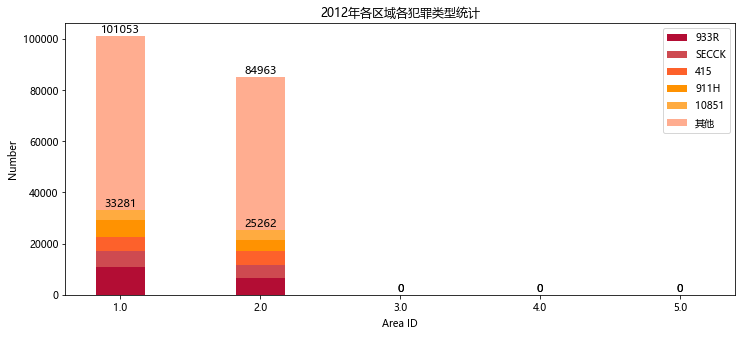

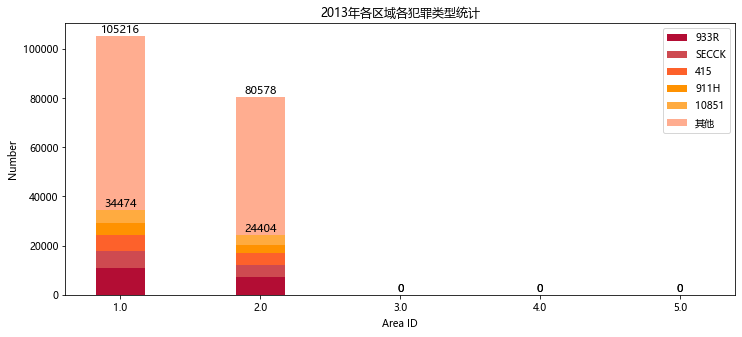

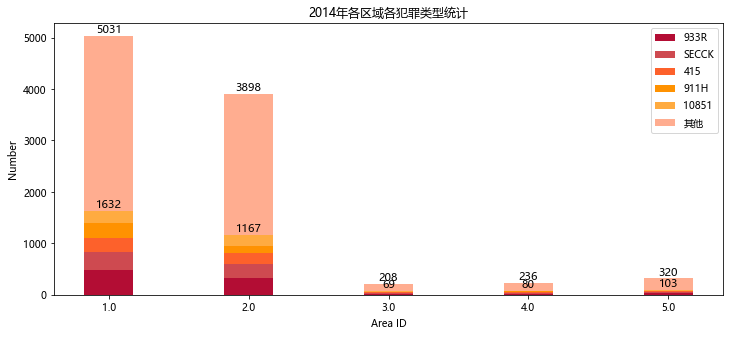

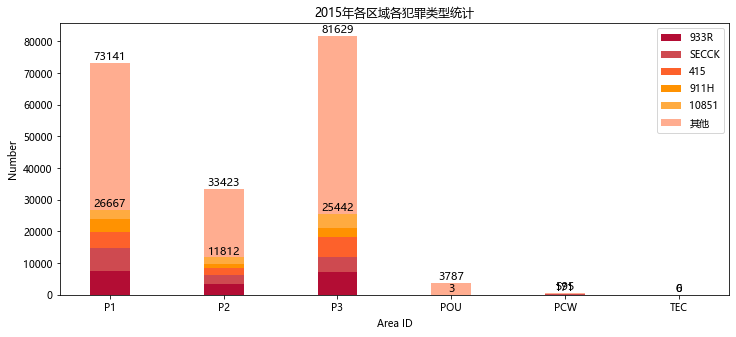

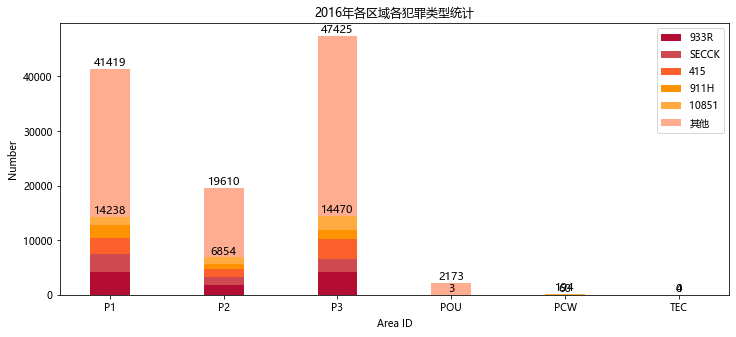

In [17]:
# 统计前五个犯罪种类和其他
# 每年的按区域ID统计犯罪数

# 前四年的区域ID取值1.0-5.0
year = 2011
index = np.arange(5)

for data in [data1,data2,data3,data4]:
    col = data.loc[:,['Area Id','Incident Type Id']]
    col = col.dropna()
    col = col.values
    incident_id = {'933R':0,'SECCK':1,'415':2,'911H':3,'10851':4}
    incident_count = np.zeros((6,5))
    # 933R,SECCK,415,911H,10851
    for area,incident in col:
        if incident not in incident_id.keys():
            incident_count[5][int(area)-1] += 1
        else:
            incident_count[incident_id[incident]][int(area)-1] += 1
    plt.figure(figsize=(12,5))
    plt.title(str(year)+'年各区域各犯罪类型统计')
    plt.xticks(index, ('1.0','2.0','3.0','4.0','5.0'))
    width= 0.35
    # 每一级的sum
    d_sum = np.zeros((6,5))
    for j in range(0,5):
        d_sum[0][j] = incident_count[0][j]
    for i in range(1,6):
        for j in range(0,5):
            d_sum[i][j] = d_sum[i-1][j] + incident_count[i][j]
    # p1 = plt.bar(index,incident_count[:,5],width,color='#B30D34') # 其他
    p2 = plt.bar(index,incident_count[0,:],width,color='#B30D34') # 933R
    p3 = plt.bar(index,incident_count[1,:],width,bottom=d_sum[0,:],color='#CE4A50') # SECCK
    p4 = plt.bar(index,incident_count[2,:],width,bottom=d_sum[1,:],color='#fd612b') # 415
    p5 = plt.bar(index,incident_count[3,:],width,bottom=d_sum[2,:],color='#FF9201') # 911H
    p6 = plt.bar(index,incident_count[4,:],width,bottom=d_sum[3,:],color='#FFAB40') # 10851 
    p1 = plt.bar(index,incident_count[5,:],width,bottom=d_sum[4,:],color='#FFAD90') # 其他

    for a,b in zip(index,d_sum[4,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    for a,b in zip(index,d_sum[5,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 

    plt.legend((p2[0],p3[0],p4[0],p5[0],p6[0],p1[0]),('933R','SECCK','415','911H','10851','其他'),loc=1)
    plt.xlabel("Area ID")
    plt.ylabel("Number")    
    plt.show()
    year+=1
    
    
index = np.arange(6)
for data in [data5,data6]:
    col = data.loc[:,['Area Id','Incident Type Id']]
    col = col.dropna()
    col = col.values
    incident_id = {'933R':0,'SECCK':1,'415':2,'911H':3,'10851':4}
    area_id = {'P1':0,'P2':1,'P3':2,'POU':3,'PCW':4,'TEC':5}
    incident_count = np.zeros((6,6))
    # 933R,SECCK,415,911H,10851
    for area,incident in col:
        # 不统计表6中的JLS和WAG区域
        if area not in area_id.keys():
            continue
        if incident not in incident_id.keys():
            incident_count[5][area_id[area]] += 1
        else:
            incident_count[incident_id[incident]][area_id[area]] += 1
    plt.figure(figsize=(12,5))
    plt.title(str(year)+'年各区域各犯罪类型统计')
    plt.xticks(index, ('P1','P2','P3','POU','PCW','TEC'))
    width= 0.35
    # 每一级的sum
    d_sum = np.zeros((6,6))
    for j in range(0,6):
        d_sum[0][j] = incident_count[0][j]
    for i in range(1,6):
        for j in range(0,6):
            d_sum[i][j] = d_sum[i-1][j] + incident_count[i][j]
    # p1 = plt.bar(index,incident_count[:,5],width,color='#B30D34') # 其他
    p2 = plt.bar(index,incident_count[0,:],width,color='#B30D34') # 933R
    p3 = plt.bar(index,incident_count[1,:],width,bottom=d_sum[0,:],color='#CE4A50') # SECCK
    p4 = plt.bar(index,incident_count[2,:],width,bottom=d_sum[1,:],color='#fd612b') # 415
    p5 = plt.bar(index,incident_count[3,:],width,bottom=d_sum[2,:],color='#FF9201') # 911H
    p6 = plt.bar(index,incident_count[4,:],width,bottom=d_sum[3,:],color='#FFAB40') # 10851 
    p1 = plt.bar(index,incident_count[5,:],width,bottom=d_sum[4,:],color='#FFAD90') # 其他

    for a,b in zip(index,d_sum[4,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    for a,b in zip(index,d_sum[5,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)  
    plt.legend((p2[0],p3[0],p4[0],p5[0],p6[0],p1[0]),('933R','SECCK','415','911H','10851','其他'),loc=1)
    plt.xlabel("Area ID")
    plt.ylabel("Number")
    plt.show()
    year+=1

In [18]:
# 统计缺失值
print(data1['Area Id'].isnull().sum(),data1['Incident Type Id'].isnull().sum())
print(data2['Area Id'].isnull().sum(),data2['Incident Type Id'].isnull().sum())
print(data3['Area Id'].isnull().sum(),data3['Incident Type Id'].isnull().sum())
print(data4['Area Id'].isnull().sum(),data4['Incident Type Id'].isnull().sum())
print(data5['Area Id'].isnull().sum(),data5['Incident Type Id'].isnull().sum())
print(data6['Area Id'].isnull().sum(),data6['Incident Type Id'].isnull().sum())

904 1
1415 1
2258 1
177787 0
0 0
1 1


**根据上文中对案件类型的频数统计以及直方图分析如下：**
- 2011-2014年的AreaID部分都有缺失值，其中2014年大量缺失，可能导致统计结果不准确。2015-2016年的统计数据缺失极少，统计结果具有较强参考性。
- 在1.0区域的案件数量最多，4.0和5.0区域无案件记录；
- 对案件数量排名前5的案件归类统计后发现，933R案件发生次数最多。
- 2012年，1.0和2.0区域案件数较上一年呈增长趋势，3.0区域无案件记录，933R案件类型仍为发生次数最多的案件。
- 2014年的统计表中大部分数据的Area Id缺失，直方图结果不能代表真实情况。但直方图表明3.0、4.0和5.0区域开始出现案件记录。众多案件中，933R类型仍为案件主流。
- 2015年和2016年的区域ID发生变化，且缺失值变少，可能管理范围更加严格明确，在这两年中，P3区域的案件数目最多，15年较16年案件数减少约1/3，933R仍为案件主流。P3区域的415案件数目较多且变化不大。

### 3.3 离群点分析
针对Priority进行分析。

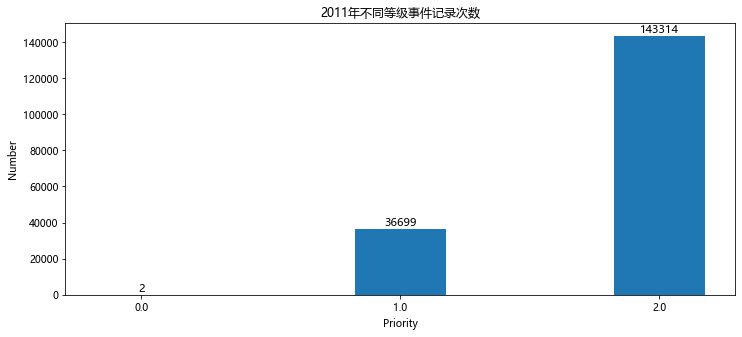

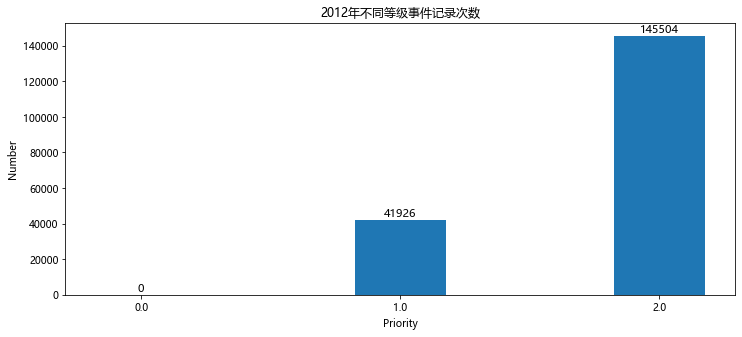

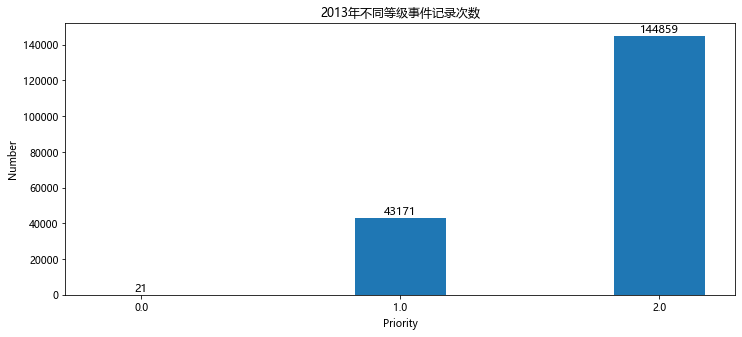

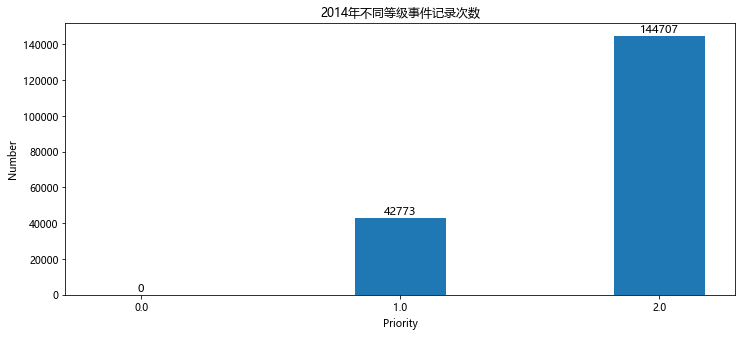

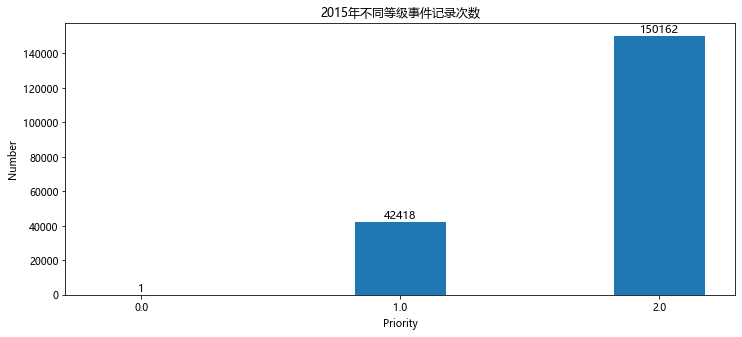

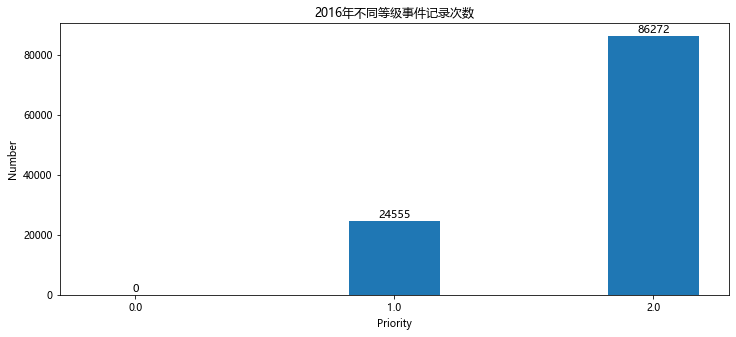

In [19]:
year = 2011
index = np.arange(3)
for data in data_all:
    lis = data['Priority']
    lis = lis.dropna()
    lis = lis.values
    count=np.zeros(3)
    for t in lis:
        count[int(t)] += 1
    plt.figure(figsize=(12,5))
    plt.bar(index,count, 0.35, label="count")
    plt.xticks(index,('0.0','1.0','2.0'))
    for a,b in zip(index,count):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    plt.xlabel("Priority")
    plt.ylabel("Number")  
    plt.title(str(year)+'年不同等级事件记录次数')
    year=year+1

- 2013年0.0级事件发生21起，为近几年最高频次，2.0级事件在三年中较其他事件规模更大，由此推测0.0级为影响较为严重的事件。

## 4. 缺失值处理


### 4.1 将缺失部分剔除


In [20]:
#复制数据
cdata1 = data1.copy(deep=True)
cdata2 = data2.copy(deep=True)
cdata3 = data3.copy(deep=True)
cdata4 = data4.copy(deep=True)
cdata5 = data5.copy(deep=True)
cdata6 = data6.copy(deep=True)
cdata_all=[cdata1,cdata2,cdata3,cdata4,cdata5,cdata6]
cols1 = list(data1)
cols2 = list(data2)
cols3 = list(data3)
cols4 = list(data4)
cols5 = list(data5)
cols6 = list(data6)
cols_all = [cols1,cols2,cols3,cols4,cols5,cols6]

In [21]:
cdata1.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
3,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
4,OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000


**删除Create Time的缺失记录**

In [22]:
# createtime缺失的元组
for data in cdata_all:
    print(data['Create Time'].isnull().sum())

1
1
1
0
0
1


In [23]:
# 删除空元组
for data in cdata_all:
    data.dropna(how="any", subset=["Create Time"],inplace=True)
    
for data in cdata_all:
    print(data['Create Time'].isnull().sum())

0
0
0
0
0
0


In [24]:
### location缺失元组

# location缺失占比
year = 2011
for data in cdata_all:

    print(u'年份：{};location缺失:{};\t总记录数：{}\t;缺失值占比：{}'.format(year,
                           data['Location'].isnull().sum(),
                          len(data),
                         data['Location'].isnull().sum()/len(data) ))
    year+=1

年份：2011;location缺失:0;	总记录数：180015	;缺失值占比：0.0
年份：2012;location缺失:69;	总记录数：187430	;缺失值占比：0.00036813743797684467
年份：2013;location缺失:0;	总记录数：188051	;缺失值占比：0.0
年份：2014;location缺失:42;	总记录数：187480	;缺失值占比：0.00022402389588222743
年份：2015;location缺失:0;	总记录数：192581	;缺失值占比：0.0
年份：2016;location缺失:0;	总记录数：110827	;缺失值占比：0.0


**考虑到缺失值占比较小，选择删除Location缺失的记录**

In [25]:
# 删除location缺失记录
for data in cdata_all:
    data.dropna(how="any", subset=["Location"],inplace=True)

for data in cdata_all:
    print(data['Location'].isnull().sum())

0
0
0
0
0
0


### 4.2 高频率值填补缺失值
**删除location缺失的记录后，处理areaID缺失和Beat缺失**

In [26]:
year = 2011
for data in cdata_all:

    print(u'年份：{};Area Id缺失:{};\t总记录数：{}\t;缺失值占比：{}'.format(year,
                           data['Area Id'].isnull().sum(),
                          len(data),
                         data['Area Id'].isnull().sum()/len(data) ))
    year+=1

年份：2011;Area Id缺失:903;	总记录数：180015	;缺失值占比：0.005016248645946171
年份：2012;Area Id缺失:1406;	总记录数：187361	;缺失值占比：0.00750422980236015
年份：2013;Area Id缺失:2257;	总记录数：188051	;缺失值占比：0.012002063270070354
年份：2014;Area Id缺失:177748;	总记录数：187438	;缺失值占比：0.9483029054940834
年份：2015;Area Id缺失:0;	总记录数：192581	;缺失值占比：0.0
年份：2016;Area Id缺失:0;	总记录数：110827	;缺失值占比：0.0


In [27]:
year = 2011
for data in cdata_all:

    print(u'年份：{};Beat缺失:{};\t总记录数：{}\t;缺失值占比：{}'.format(year,
                           data['Beat'].isnull().sum(),
                          len(data),
                         data['Beat'].isnull().sum()/len(data) ))
    year+=1

年份：2011;Beat缺失:519;	总记录数：180015	;缺失值占比：0.0028830930755770353
年份：2012;Beat缺失:922;	总记录数：187361	;缺失值占比：0.004920981420893355
年份：2013;Beat缺失:1177;	总记录数：188051	;缺失值占比：0.006258940393829334
年份：2014;Beat缺失:1178;	总记录数：187438	;缺失值占比：0.006284744822287903
年份：2015;Beat缺失:1325;	总记录数：192581	;缺失值占比：0.006880221828736999
年份：2016;Beat缺失:580;	总记录数：110827	;缺失值占比：0.00523338175715304


**2014年缺失Id的记录较多，各年份中的Beat值缺失较少，考虑将缺失部分用最高频率值填补**

In [28]:
# 众数
for data in cdata_all:
    print(cdata1['Beat'].value_counts().head(1))

04X    7410
Name: Beat, dtype: int64
04X    7410
Name: Beat, dtype: int64
04X    7410
Name: Beat, dtype: int64
04X    7410
Name: Beat, dtype: int64
04X    7410
Name: Beat, dtype: int64
04X    7410
Name: Beat, dtype: int64


In [29]:
# Beat值用04X填充,Area Id用高频数据填补
for data in cdata_all:
    data.fillna({'Area Id': data['Area Id'].mode().item(), 'Beat': data['Beat'].mode().item()},inplace=True)

for data in cdata_all:
    print(data['Beat'].isnull().sum())
    print(data['Area Id'].isnull().sum())


0
0
0
0
0
0
0
0
0
0
0
0


### 4.3 通过数据相似性填充缺失值

**agency只有一个值，空值用OP填充**

In [30]:
for data in cdata_all:
    data['Agency'].fillna('OP',inplace=True)
for data in cdata_all:
    print(data['Agency'].value_counts())

OP    180015
Name: Agency, dtype: int64
OP    187361
Name: Agency, dtype: int64
OP    188051
Name: Agency, dtype: int64
OP    187438
Name: Agency, dtype: int64
OP    192581
Name: Agency, dtype: int64
OP    110827
Name: Agency, dtype: int64


**incident Type Id和incident Type Destription一一对应，可用已有的填充缺失值**

In [31]:
for data in cdata_all:
    data_ = data[['Incident Type Id','Incident Type Description']]
    data_=data_[data_.isnull().T.any()]
    print(data_)
    print("=" * 50)

Empty DataFrame
Columns: [Incident Type Id, Incident Type Description]
Index: []
Empty DataFrame
Columns: [Incident Type Id, Incident Type Description]
Index: []
       Incident Type Id Incident Type Description
178947              JGP                       NaN
185820              JGP                       NaN
186584              JGP                       NaN
187409              JGP                       NaN
       Incident Type Id Incident Type Description
2382                JGP                       NaN
11137               JGP                       NaN
13174               JGP                       NaN
18605               JGP                       NaN
37673               JGP                       NaN
...                 ...                       ...
182424              JGP                       NaN
183100              JGP                       NaN
184135              JGP                       NaN
186580              JGP                       NaN
187323              JGP               

**JGP的事件描述都为NAN，无法通过相似性填充空值。**

### 4.4 通过属性相关关系填充缺失值
- 由于Location和Area Id有关，考虑通过前者填充后者。data3中包含的Location与Area Id映射最多，用该数据集做字典填充其他数据集。

In [32]:
loc_area = {}

P = cdata1.dropna()
loc = P['Location']
area= P['Area Id']
loc = loc.values
area = area.values
for l,a in zip(loc,area):
    loc_area[l] = a

data_1 = data1[['Location','Area Id']]

for i in range(len(data_1)):
    if np.isnan(data_1['Area Id'][i]):
        a = data_1['Location'][i]
        if a in loc_area:
            th = loc_area[a]
            data_1.loc[i, 'Area Id'] = th  
print(data_1.isnull()['Area Id'].sum())

D:\Anaconda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0


Text(0.5, 1.0, '2011')

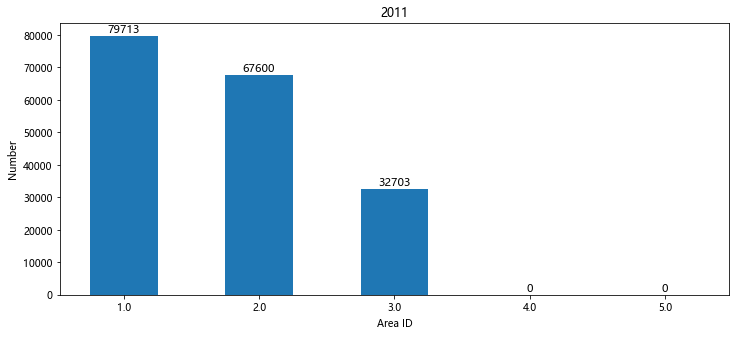

In [33]:

index = np.arange(5)
lis = data_1['Area Id']
lis = lis.dropna()
lis = lis.values
Area_count=np.zeros(5)
for t in lis:
    Area_count[int(t)-1] += 1
plt.figure(figsize=(12,5))
plt.bar(index,Area_count, 0.5, label="Area_count")
plt.xticks(index,('1.0','2.0','3.0','4.0','5.0'))
for a,b in zip(index,Area_count):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
plt.xlabel("Area ID")
plt.ylabel("Number")  
plt.title(2011)

**相比于上文的直方图，填充后各区域的案件数都有所增长，但仍有252个空值无法填充，可能需要提供额外信息进行填充。**

### 可视化比较清洗前后数据集

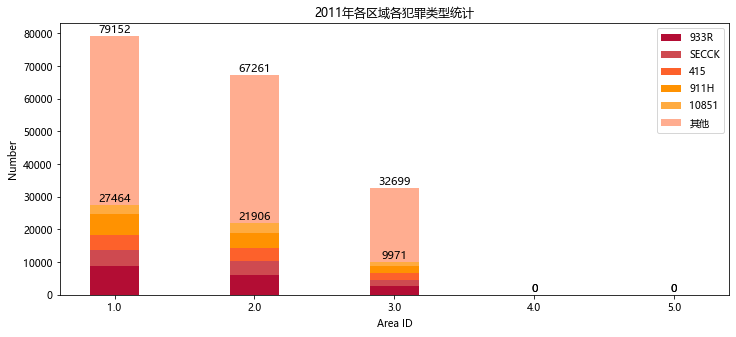

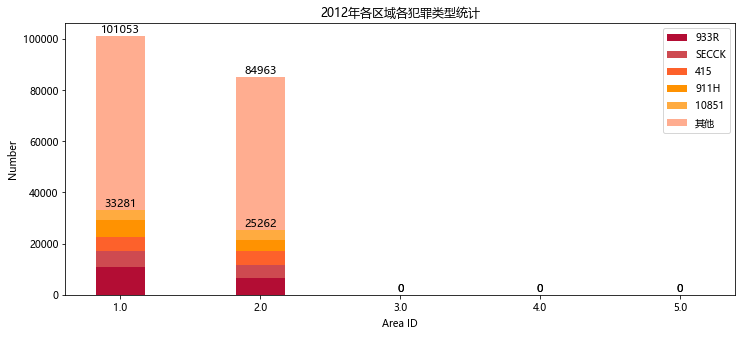

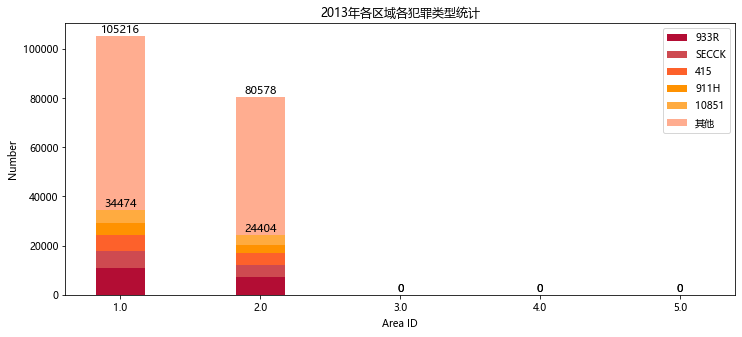

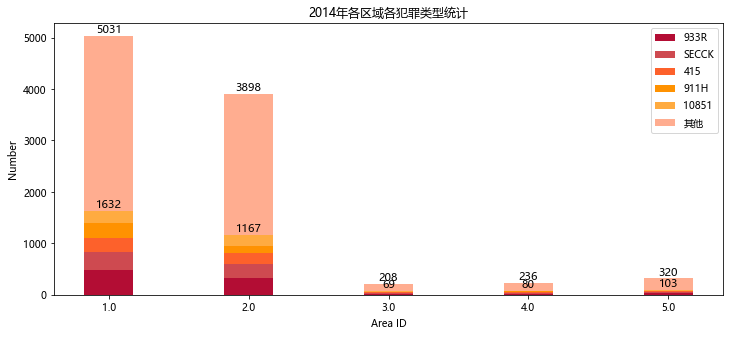

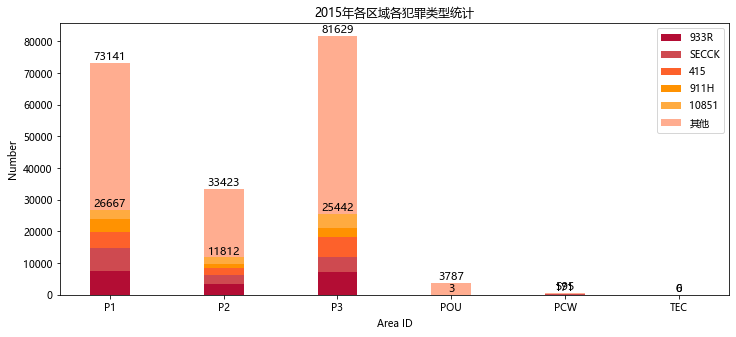

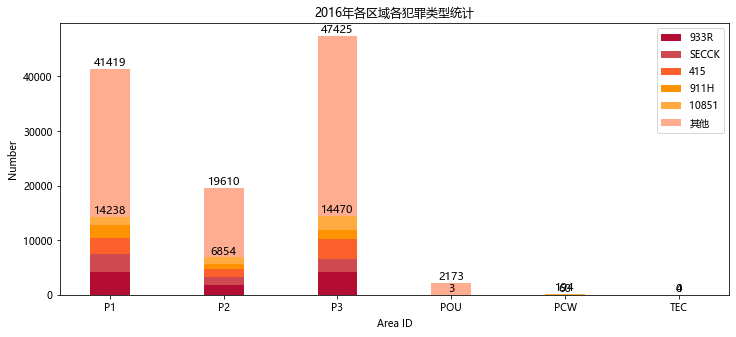

In [34]:
# 统计前五个犯罪种类和其他
# 每年的按区域ID统计犯罪数

# 前四年的区域ID取值1.0-5.0
year = 2011
index = np.arange(5)

for data in [data1,data2,data3,data4]:
    col = data.loc[:,['Area Id','Incident Type Id']]
    col = col.dropna()
    col = col.values
    incident_id = {'933R':0,'SECCK':1,'415':2,'911H':3,'10851':4}
    incident_count = np.zeros((6,5))
    # 933R,SECCK,415,911H,10851
    for area,incident in col:
        if incident not in incident_id.keys():
            incident_count[5][int(area)-1] += 1
        else:
            incident_count[incident_id[incident]][int(area)-1] += 1
    plt.figure(figsize=(12,5))
    plt.title(str(year)+'年各区域各犯罪类型统计')
    plt.xticks(index, ('1.0','2.0','3.0','4.0','5.0'))
    width= 0.35
    # 每一级的sum
    d_sum = np.zeros((6,5))
    for j in range(0,5):
        d_sum[0][j] = incident_count[0][j]
    for i in range(1,6):
        for j in range(0,5):
            d_sum[i][j] = d_sum[i-1][j] + incident_count[i][j]
    # p1 = plt.bar(index,incident_count[:,5],width,color='#B30D34') # 其他
    p2 = plt.bar(index,incident_count[0,:],width,color='#B30D34') # 933R
    p3 = plt.bar(index,incident_count[1,:],width,bottom=d_sum[0,:],color='#CE4A50') # SECCK
    p4 = plt.bar(index,incident_count[2,:],width,bottom=d_sum[1,:],color='#fd612b') # 415
    p5 = plt.bar(index,incident_count[3,:],width,bottom=d_sum[2,:],color='#FF9201') # 911H
    p6 = plt.bar(index,incident_count[4,:],width,bottom=d_sum[3,:],color='#FFAB40') # 10851 
    p1 = plt.bar(index,incident_count[5,:],width,bottom=d_sum[4,:],color='#FFAD90') # 其他

    for a,b in zip(index,d_sum[4,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    for a,b in zip(index,d_sum[5,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 

    plt.legend((p2[0],p3[0],p4[0],p5[0],p6[0],p1[0]),('933R','SECCK','415','911H','10851','其他'),loc=1)
    plt.xlabel("Area ID")
    plt.ylabel("Number")    
    plt.show()
    year+=1
    
    
index = np.arange(6)
for data in [data5,data6]:
    col = data.loc[:,['Area Id','Incident Type Id']]
    col = col.dropna()
    col = col.values
    incident_id = {'933R':0,'SECCK':1,'415':2,'911H':3,'10851':4}
    area_id = {'P1':0,'P2':1,'P3':2,'POU':3,'PCW':4,'TEC':5}
    incident_count = np.zeros((6,6))
    # 933R,SECCK,415,911H,10851
    for area,incident in col:
        # 不统计表6中的JLS和WAG区域
        if area not in area_id.keys():
            continue
        if incident not in incident_id.keys():
            incident_count[5][area_id[area]] += 1
        else:
            incident_count[incident_id[incident]][area_id[area]] += 1
    plt.figure(figsize=(12,5))
    plt.title(str(year)+'年各区域各犯罪类型统计')
    plt.xticks(index, ('P1','P2','P3','POU','PCW','TEC'))
    width= 0.35
    # 每一级的sum
    d_sum = np.zeros((6,6))
    for j in range(0,6):
        d_sum[0][j] = incident_count[0][j]
    for i in range(1,6):
        for j in range(0,6):
            d_sum[i][j] = d_sum[i-1][j] + incident_count[i][j]
    # p1 = plt.bar(index,incident_count[:,5],width,color='#B30D34') # 其他
    p2 = plt.bar(index,incident_count[0,:],width,color='#B30D34') # 933R
    p3 = plt.bar(index,incident_count[1,:],width,bottom=d_sum[0,:],color='#CE4A50') # SECCK
    p4 = plt.bar(index,incident_count[2,:],width,bottom=d_sum[1,:],color='#fd612b') # 415
    p5 = plt.bar(index,incident_count[3,:],width,bottom=d_sum[2,:],color='#FF9201') # 911H
    p6 = plt.bar(index,incident_count[4,:],width,bottom=d_sum[3,:],color='#FFAB40') # 10851 
    p1 = plt.bar(index,incident_count[5,:],width,bottom=d_sum[4,:],color='#FFAD90') # 其他

    for a,b in zip(index,d_sum[4,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    for a,b in zip(index,d_sum[5,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)  
    plt.legend((p2[0],p3[0],p4[0],p5[0],p6[0],p1[0]),('933R','SECCK','415','911H','10851','其他'),loc=1)
    plt.xlabel("Area ID")
    plt.ylabel("Number")
    plt.show()
    year+=1

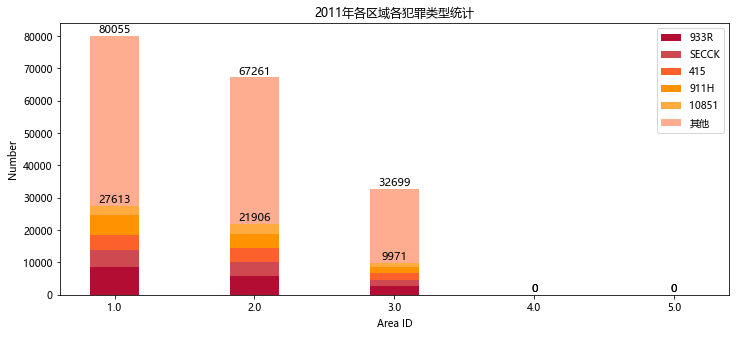

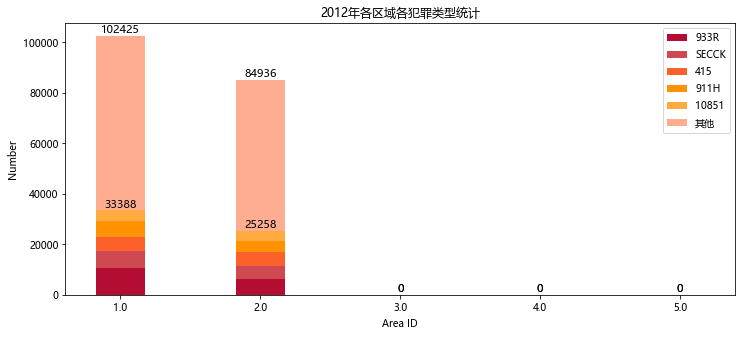

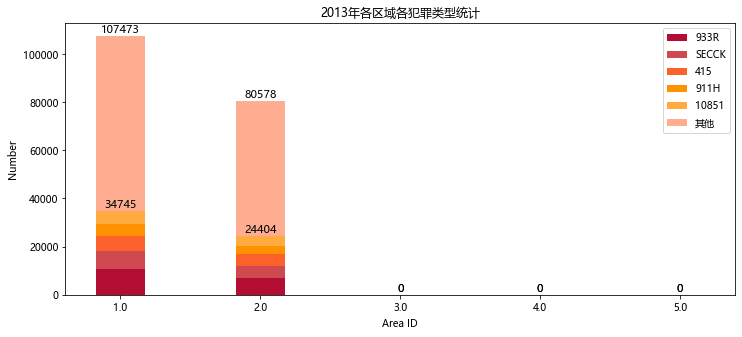

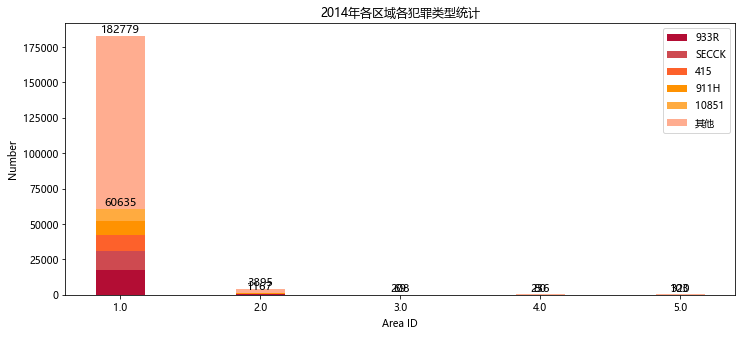

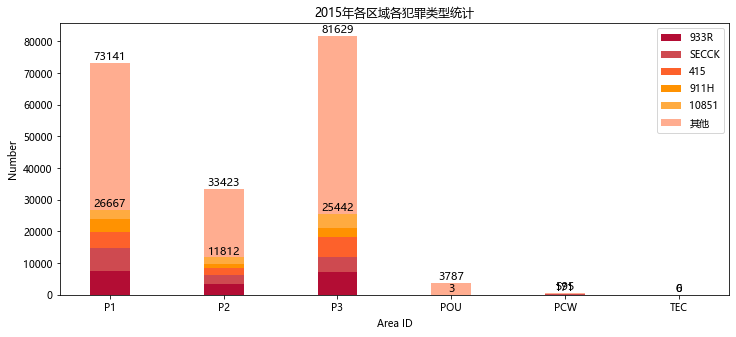

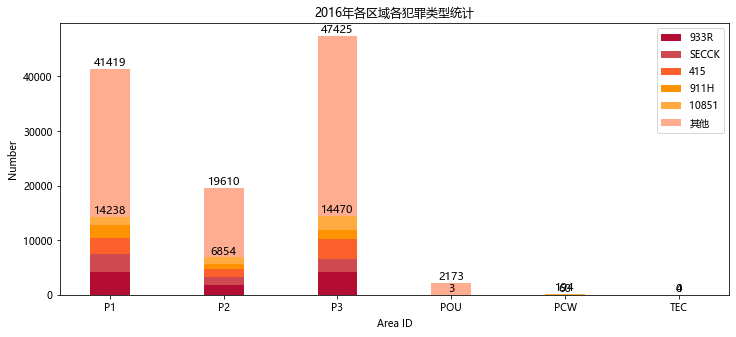

In [35]:
# 统计前五个犯罪种类和其他
# 每年的按区域ID统计犯罪数

# 前四年的区域ID取值1.0-5.0
year = 2011
index = np.arange(5)

for data in [cdata1,cdata2,cdata3,cdata4]:
    col = data.loc[:,['Area Id','Incident Type Id']]
    col = col.dropna()
    col = col.values
    incident_id = {'933R':0,'SECCK':1,'415':2,'911H':3,'10851':4}
    incident_count = np.zeros((6,5))
    # 933R,SECCK,415,911H,10851
    for area,incident in col:
        if incident not in incident_id.keys():
            incident_count[5][int(area)-1] += 1
        else:
            incident_count[incident_id[incident]][int(area)-1] += 1
    plt.figure(figsize=(12,5))
    plt.title(str(year)+'年各区域各犯罪类型统计')
    plt.xticks(index, ('1.0','2.0','3.0','4.0','5.0'))
    width= 0.35
    # 每一级的sum
    d_sum = np.zeros((6,5))
    for j in range(0,5):
        d_sum[0][j] = incident_count[0][j]
    for i in range(1,6):
        for j in range(0,5):
            d_sum[i][j] = d_sum[i-1][j] + incident_count[i][j]
    # p1 = plt.bar(index,incident_count[:,5],width,color='#B30D34') # 其他
    p2 = plt.bar(index,incident_count[0,:],width,color='#B30D34') # 933R
    p3 = plt.bar(index,incident_count[1,:],width,bottom=d_sum[0,:],color='#CE4A50') # SECCK
    p4 = plt.bar(index,incident_count[2,:],width,bottom=d_sum[1,:],color='#fd612b') # 415
    p5 = plt.bar(index,incident_count[3,:],width,bottom=d_sum[2,:],color='#FF9201') # 911H
    p6 = plt.bar(index,incident_count[4,:],width,bottom=d_sum[3,:],color='#FFAB40') # 10851 
    p1 = plt.bar(index,incident_count[5,:],width,bottom=d_sum[4,:],color='#FFAD90') # 其他

    for a,b in zip(index,d_sum[4,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    for a,b in zip(index,d_sum[5,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 

    plt.legend((p2[0],p3[0],p4[0],p5[0],p6[0],p1[0]),('933R','SECCK','415','911H','10851','其他'),loc=1)
    plt.xlabel("Area ID")
    plt.ylabel("Number")    
    plt.show()
    year+=1
    
    
index = np.arange(6)
for data in [cdata5,cdata6]:
    col = data.loc[:,['Area Id','Incident Type Id']]
    col = col.dropna()
    col = col.values
    incident_id = {'933R':0,'SECCK':1,'415':2,'911H':3,'10851':4}
    area_id = {'P1':0,'P2':1,'P3':2,'POU':3,'PCW':4,'TEC':5}
    incident_count = np.zeros((6,6))
    # 933R,SECCK,415,911H,10851
    for area,incident in col:
        # 不统计表6中的JLS和WAG区域
        if area not in area_id.keys():
            continue
        if incident not in incident_id.keys():
            incident_count[5][area_id[area]] += 1
        else:
            incident_count[incident_id[incident]][area_id[area]] += 1
    plt.figure(figsize=(12,5))
    plt.title(str(year)+'年各区域各犯罪类型统计')
    plt.xticks(index, ('P1','P2','P3','POU','PCW','TEC'))
    width= 0.35
    # 每一级的sum
    d_sum = np.zeros((6,6))
    for j in range(0,6):
        d_sum[0][j] = incident_count[0][j]
    for i in range(1,6):
        for j in range(0,6):
            d_sum[i][j] = d_sum[i-1][j] + incident_count[i][j]
    # p1 = plt.bar(index,incident_count[:,5],width,color='#B30D34') # 其他
    p2 = plt.bar(index,incident_count[0,:],width,color='#B30D34') # 933R
    p3 = plt.bar(index,incident_count[1,:],width,bottom=d_sum[0,:],color='#CE4A50') # SECCK
    p4 = plt.bar(index,incident_count[2,:],width,bottom=d_sum[1,:],color='#fd612b') # 415
    p5 = plt.bar(index,incident_count[3,:],width,bottom=d_sum[2,:],color='#FF9201') # 911H
    p6 = plt.bar(index,incident_count[4,:],width,bottom=d_sum[3,:],color='#FFAB40') # 10851 
    p1 = plt.bar(index,incident_count[5,:],width,bottom=d_sum[4,:],color='#FFAD90') # 其他

    for a,b in zip(index,d_sum[4,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11) 
    for a,b in zip(index,d_sum[5,:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)  
    plt.legend((p2[0],p3[0],p4[0],p5[0],p6[0],p1[0]),('933R','SECCK','415','911H','10851','其他'),loc=1)
    plt.xlabel("Area ID")
    plt.ylabel("Number")
    plt.show()
    year+=1

In [36]:
cdata1.isnull().sum()

Agency                       0
Create Time                  0
Location                     0
Area Id                      0
Beat                         0
Priority                     0
Incident Type Id             0
Incident Type Description    0
Event Number                 0
Closed Time                  6
dtype: int64

**可以看到，缺失值已被填补后的直方图数据较之前都有增长。**